In [15]:
from fastai.vision.all import *

In [16]:
path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset"
size = 224
bs = 64

In [17]:
data = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                get_y=parent_label,
                item_tfms=Resize(224),
                batch_tfms=aug_transforms())

In [18]:
dls = data.dataloaders(path,bs=64)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

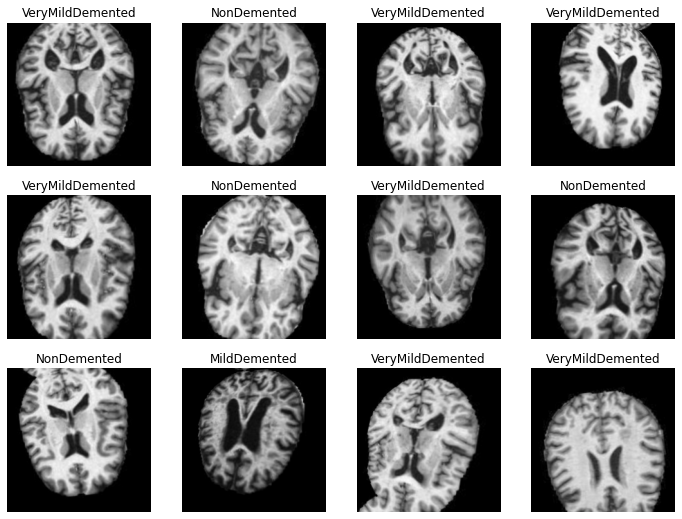

In [19]:
dls.show_batch(max_n=12,nrows=3)
dls.vocab

In [20]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)
learn.fine_tune(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.812821,1.134366,0.574219,00:27


epoch,train_loss,valid_loss,accuracy,time
0,1.191470,0.868659,0.650781,00:33
1,0.986054,0.749305,0.710938,00:33
2,0.798700,0.622495,0.734375,00:33
3,0.618909,0.492355,0.785937,00:33
4,0.461076,0.355733,0.850000,00:33
5,0.333241,0.267814,0.903125,00:33
6,0.240778,0.264513,0.901563,00:33
7,0.189193,0.264286,0.897656,00:33


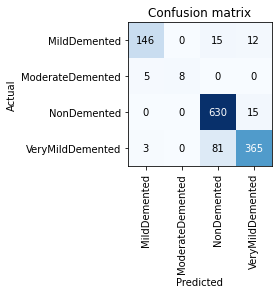

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

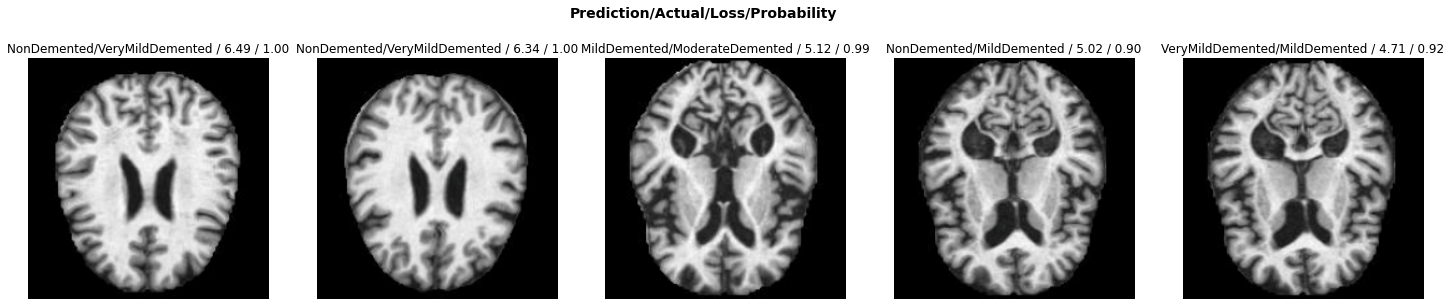

In [22]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

In [23]:
from fastai.vision.widgets import *
btn_run = widgets.Button(description='Classify')

In [24]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [25]:
btn_upload = widgets.FileUpload()

out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [26]:
VBox([widgets.Label('Select a X-ray'),btn_upload, btn_run, out_pl, lbl_pred])

NameError: name 'learn_inf' is not defined

In [27]:
learn.predict("../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27.jpg")

('ModerateDemented',
 tensor(1),
 tensor([1.0348e-03, 9.8245e-01, 9.0793e-05, 1.6425e-02]))